In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
##importing the modules
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [9]:
## load the data
application_data = pd.read_csv("application_data.csv")
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
application_data.shape

(307511, 122)

In [11]:
application_data.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [12]:
application_data.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [13]:
## Finding null values
null_percentage = application_data.isnull().sum()/len(application_data)*100

In [14]:
null_percentage.sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [15]:
## Cleaning the data to make it better for analysing

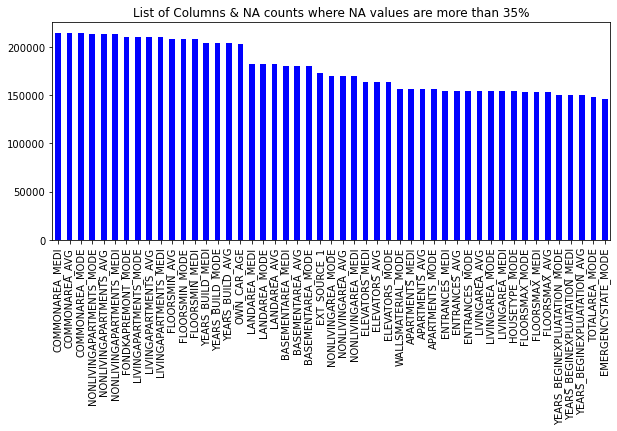

In [16]:
NA_columns = application_data.isnull().sum().sort_values(ascending = False)
NA_columns = NA_columns[NA_columns.values >(0.35*len(application_data))]
plt.figure(figsize=(10,4))
NA_columns.plot(kind='bar', color="Blue")
plt.title('List of Columns & NA counts where NA values are more than 35%')
plt.show()

In [17]:
# Number of columns having percentage of null values > 35%
len(NA_columns)

49

In [18]:
# Checking the % of null values for each column in new dataset
null_values = application_data.isnull().sum()/len(application_data)*100
null_values.sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [19]:
## Imputing 

In [20]:
## imputing occupation type 

In [21]:
application_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
application_data.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [23]:
##imputing missing values for AMT_REQ_CREDIT_BUREAU_YEAR' with mode, which is the value '0'

In [24]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [25]:
##we can impute the missing values of columns 'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' with the mode, which is the value '0'. Since they all are number of credit inquiries, replacing missing values with the most frequent value would make more sense.

In [26]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [27]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [28]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [29]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [30]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [31]:
##AMT_GOODS_PRICE', we can impute the missing values with the median.

In [32]:
application_data.AMT_GOODS_PRICE.value_counts() 

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [33]:
application_data.AMT_GOODS_PRICE.median()

450000.0

In [34]:
##AMT_ANNUITY', we can impute the missing values with the median.

In [35]:
application_data.AMT_ANNUITY.value_counts()
application_data.AMT_ANNUITY.median()

24903.0

In [36]:
## Errors in data 

In [37]:
# Checking the values present in columns starting with 'DAYS'
print(application_data['DAYS_BIRTH'].unique())
print(application_data['DAYS_EMPLOYED'].unique())
print(application_data['DAYS_REGISTRATION'].unique())
print(application_data['DAYS_ID_PUBLISH'].unique())
print(application_data['DAYS_LAST_PHONE_CHANGE'].unique())
filter_col = [col for col in application_data if col.startswith('DAYS')]
filter_col

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [38]:
application_data[filter_col]= abs(application_data[filter_col])

In [39]:
print(application_data['DAYS_BIRTH'].unique())
print(application_data['DAYS_EMPLOYED'].unique())
print(application_data['DAYS_REGISTRATION'].unique())
print(application_data['DAYS_ID_PUBLISH'].unique())
print(application_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [40]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [41]:
application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [42]:
##Imputing the value'XNA'

In [43]:
## Replacing the xna with 'F'

In [44]:
application_data.loc[application_data.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
application_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [45]:
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [46]:
# Replacing XNA with NaN

In [47]:
application_data = application_data.replace('XNA',np.NaN)
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [48]:
## Finding Outliers

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



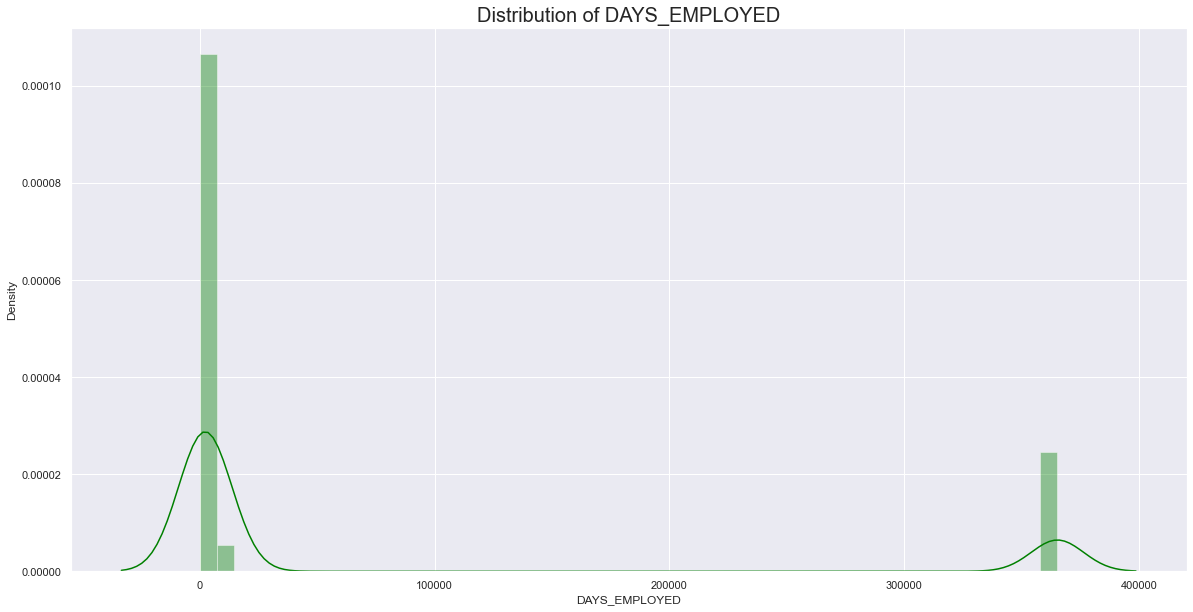

In [49]:
# distribution of 'DAYS_EMPLOYED'
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(application_data['DAYS_EMPLOYED'], color="Green" )
plt.title('Distribution of DAYS_EMPLOYED', fontdict={'fontsize':20} )
plt.show()

In [50]:
## Dividing the dataset into two different datasets based upon 'Target' value. 

In [51]:
target_0 = application_data.loc[application_data.TARGET == 0]
target_1 = application_data.loc[application_data.TARGET == 1]

In [52]:
##Univariate Analysis of Numerical Variables on the basis of 'Target' Variable

In [53]:
# Function for univariate plots
def uni(df,col,hue =None):
    sns.set(style="darkgrid")
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[~df[col].isna()][col],ax=ax[0], color="Green")
    plt.yscale('log')
    ax[1].set_title("Box Plot")
    sns.boxplot(data =df, x=col,ax=ax[1],orient='v', color="Green")
    plt.yscale('log')
    plt.show()

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:376: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



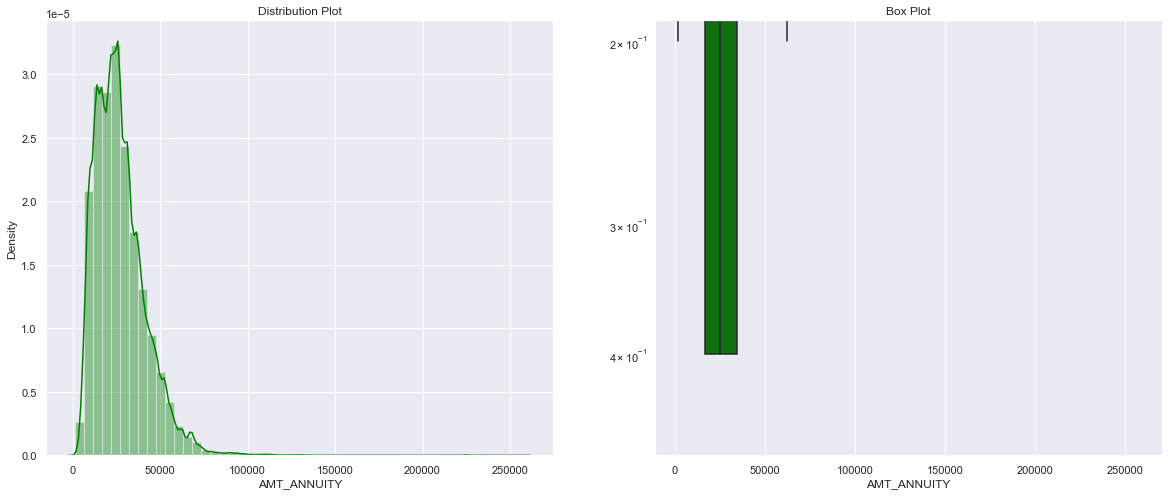

In [54]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan Non-Payment Difficulties
uni(df=target_0,col='AMT_ANNUITY')

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:376: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



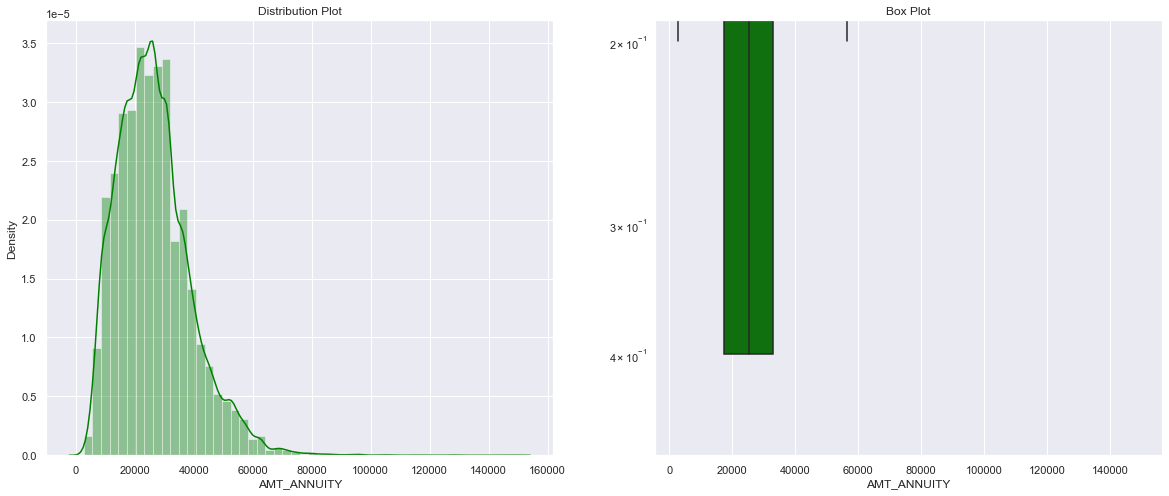

In [55]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan- Payment Difficulties
uni(df=target_1,col='AMT_ANNUITY')

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:376: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



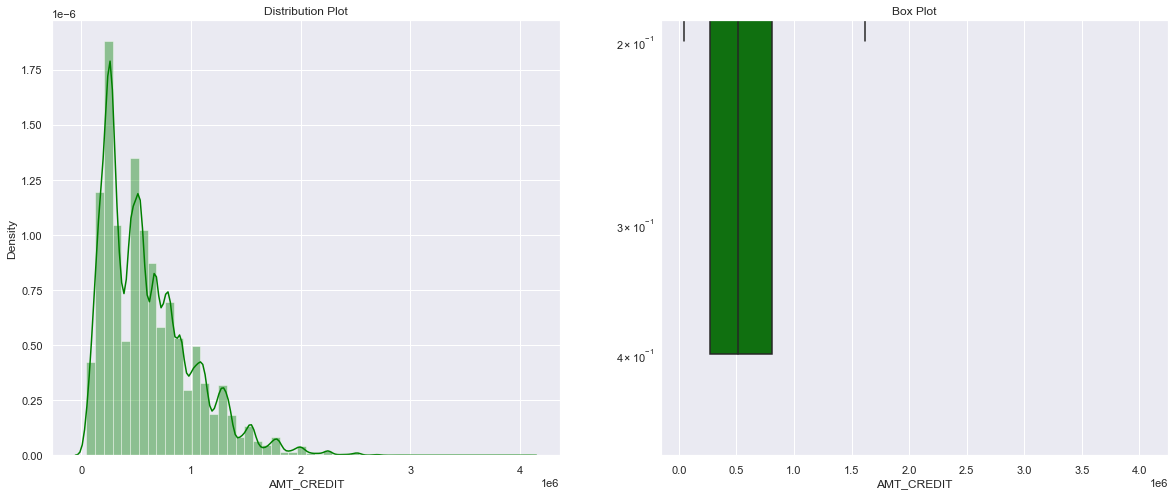

In [56]:
# Distribution and Box plot for 'AMT_CREDIT' for Loan Non-Payment Difficulties
uni(df=target_0,col='AMT_CREDIT')

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:376: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



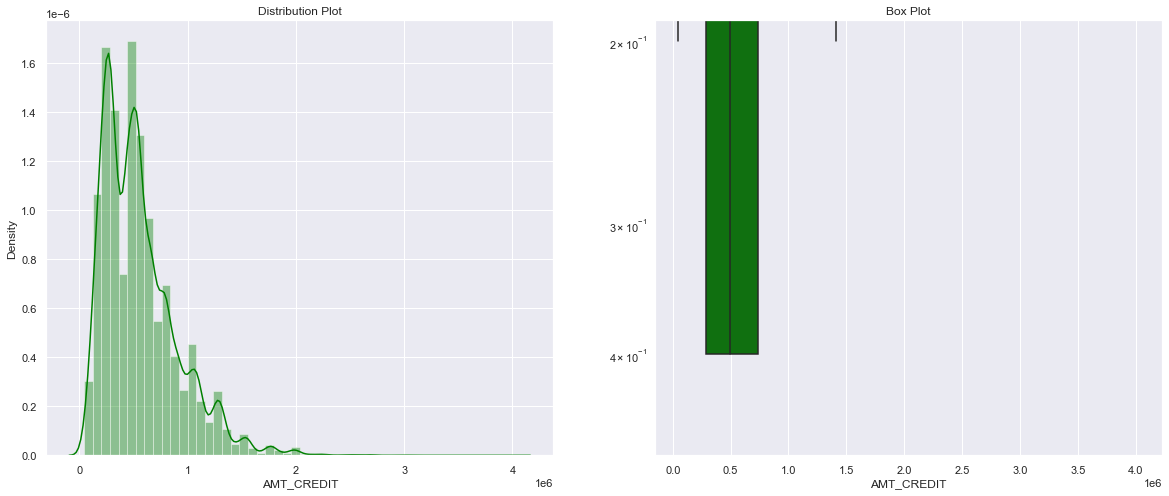

In [57]:
# Distribution and Box plot for 'AMT_CREDIT' for Loan Payment Difficulties
uni(df=target_1,col='AMT_CREDIT')

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:376: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



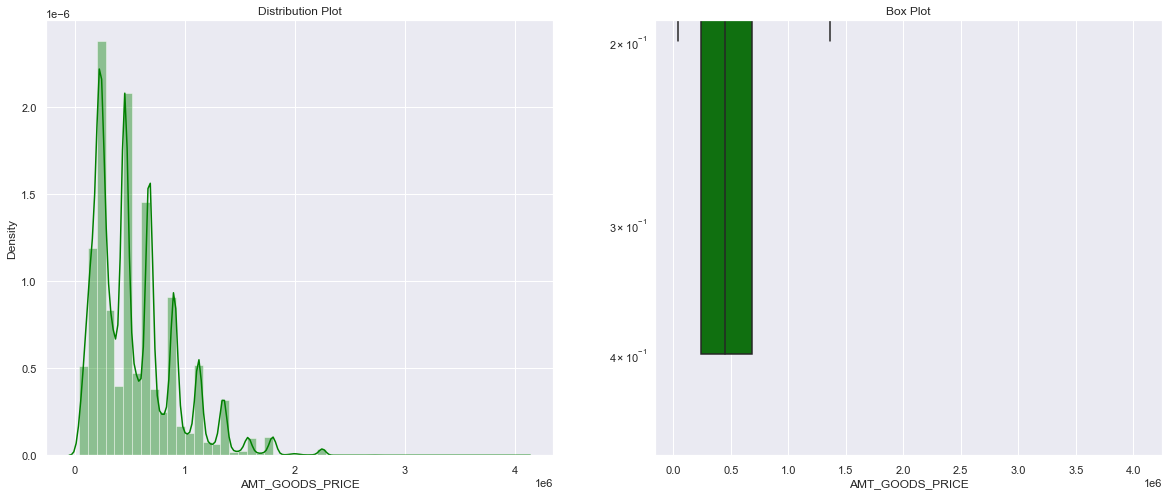

In [58]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan- Non-Payment Difficulties
uni(df=target_0,col='AMT_GOODS_PRICE')

In [ ]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan-Payment Difficulties
uni(df=target_1,col='AMT_GOODS_PRICE')

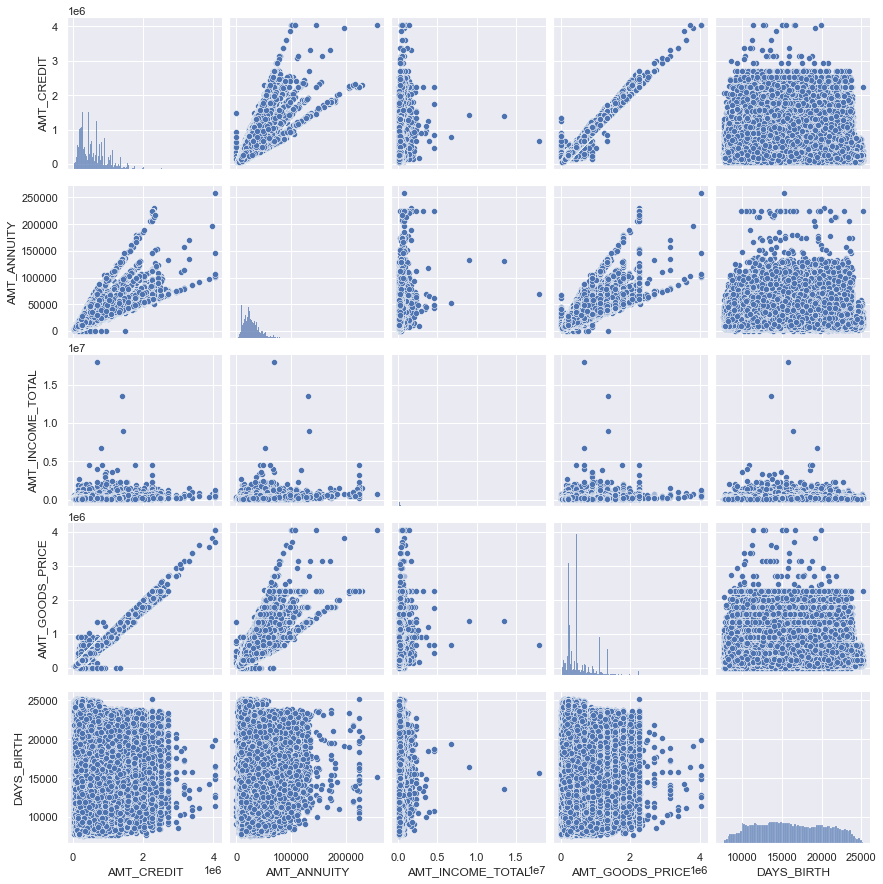

In [60]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)
pair = target_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

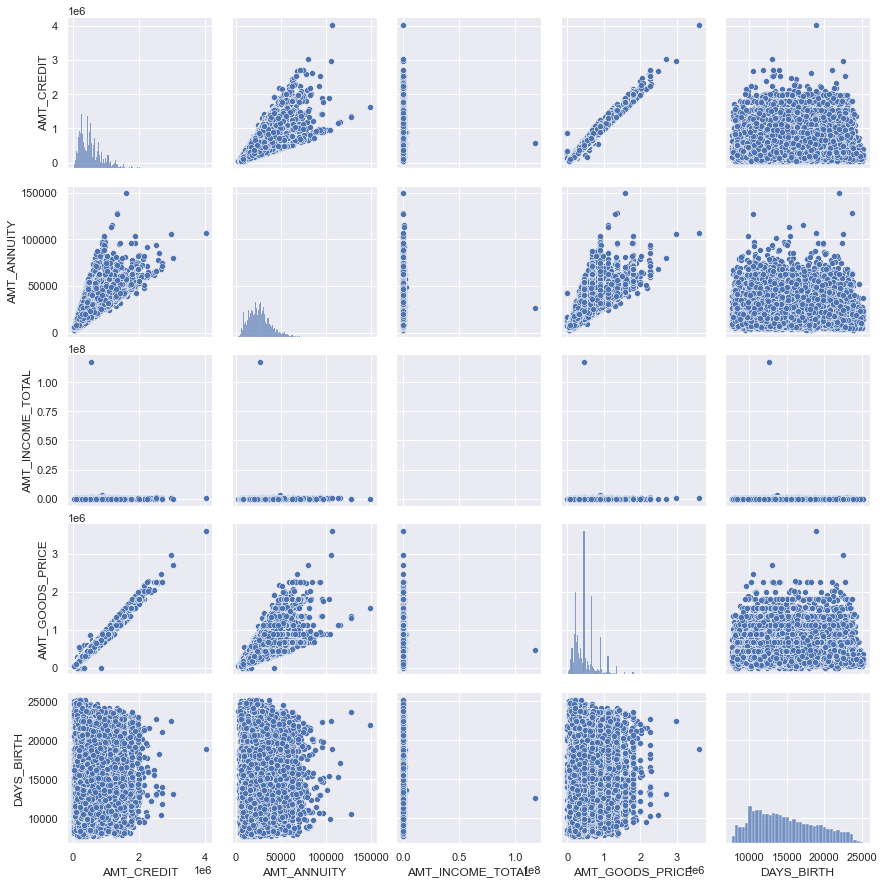

In [61]:
#Pairplot for Target 1 (Loan-Payment Difficulties)
pair = target_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

In [62]:
target_0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson').iplot(kind='heatmap',colorscale="Blues",title="Correlation Heatmap of Loan- Non Payment Difficulties")

In [63]:
target_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson').iplot(kind='heatmap',colorscale="Blues",title="Correlation Heatmap of Loan-Payment Difficulties")

In [64]:
corr=target_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

/var/folders/2j/m2lf0qfs03n5ykkg830krm3c0000gn/T/ipykernel_5406/912610222.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [65]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

In [66]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
56,AMT_CREDIT,AMT_GOODS_PRICE,0.983103,0.983103
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699,0.752699
58,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582185,0.582185
44,DAYS_REGISTRATION,DAYS_BIRTH,0.289114,0.289114
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863,0.252863
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
43,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.135810,0.135810
60,AMT_CREDIT,DAYS_BIRTH,0.135316,0.135316


In [67]:
##  Data Analysis on Previous Application data
## importing the dataset
application_data_prev= pd.read_csv('previous_application.csv')

In [68]:
##  Changing the negative values in the columns whose name start with DAYS to positive values.
filter_col = [col for col in application_data_prev if col.startswith('DAYS')]
application_data_prev[filter_col]= abs(application_data_prev[filter_col])

In [69]:
application_data_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Replacing XNA and XAP with NAN 
application_data_prev=application_data_prev.replace('XNA', np.NaN)
application_data_prev=application_data_prev.replace('XAP', np.NaN)

In [79]:
# Value counts of Contract Status in previous application
application_data_prev['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [80]:
###Univariate Analysis on previous application data

In [81]:
# Contract status of previous application
temp = application_data_prev["NAME_CONTRACT_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
df.iplot(kind='pie',labels='labels',values='values', title='Contract status of previous application',colors=['green','red','blue', 'black',])

In [82]:
# On which day clients applied for loan in previous data and their counts
temp = application_data_prev["WEEKDAY_APPR_PROCESS_START"].value_counts()
temp.iplot(kind='bar', xTitle = 'Weekday', yTitle = "Count", title = 'On which day clients applied for loan in previous data and their counts', colors=['Blue'])

In [84]:
# Payment method that client choose to pay for the previous application
temp = application_data_prev["NAME_PAYMENT_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
df.iplot(kind='pie',labels='labels',values='values', title='Payment method that client choose to pay for the previous application',colors=['green','red','blue',])

In [85]:
# Reasons of previous application rejection
temp = application_data_prev["CODE_REJECT_REASON"].value_counts()
temp.iplot(kind='bar', xTitle = 'Reason', yTitle = "Count", title = 'Reasons of previous application rejection', colors=['Green'])

In [86]:
# Was the client old or new client when applying for the previous application
temp = application_data_prev["NAME_CLIENT_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
df.iplot(kind='pie',labels='labels',values='values', title='Was the client old or new client when applying for the previous application',colors=['red','green','blue',])

In [87]:
# Was the previous application for CASH, POS, CAR, CARDS
temp = application_data_prev["NAME_PORTFOLIO"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
df.iplot(kind='pie',labels='labels',values='values', title='Was the previous application for CASH, POS, CAR, CARDS',colors=['blue','black','green', 'cyan','red'])

In [89]:
# What kind of goods did the client apply for in the previous application
temp = application_data_prev["NAME_GOODS_CATEGORY"].value_counts()
temp.iplot(kind='bar', xTitle = 'GOODS CATEGORY', yTitle = "Count", title = 'What kind of goods did the client apply for in the previous application', colors=['blue'])

In [ ]:
##Univariate analysis of numerical columns

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:376: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



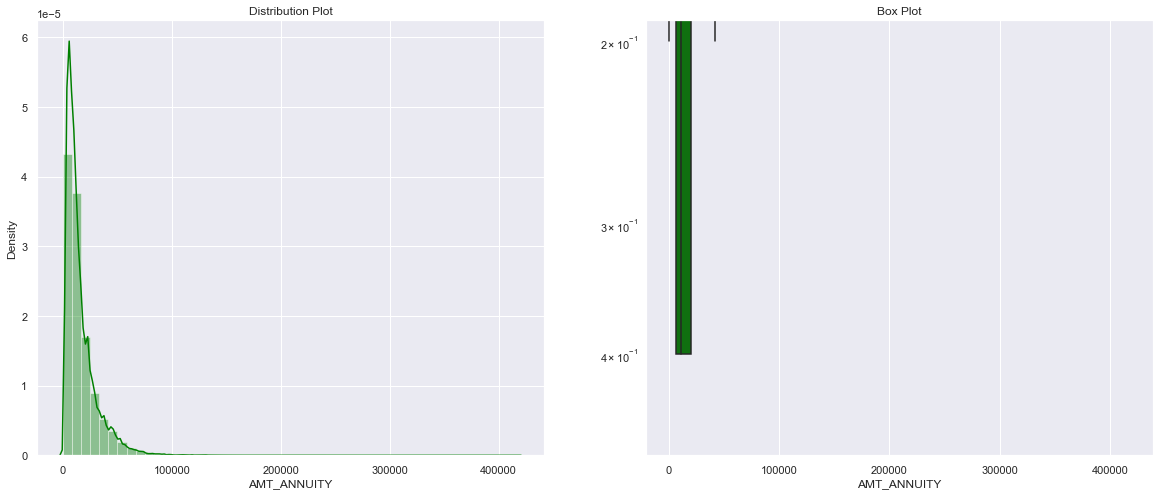

In [90]:
uni(df=application_data_prev,col='AMT_ANNUITY')

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:376: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



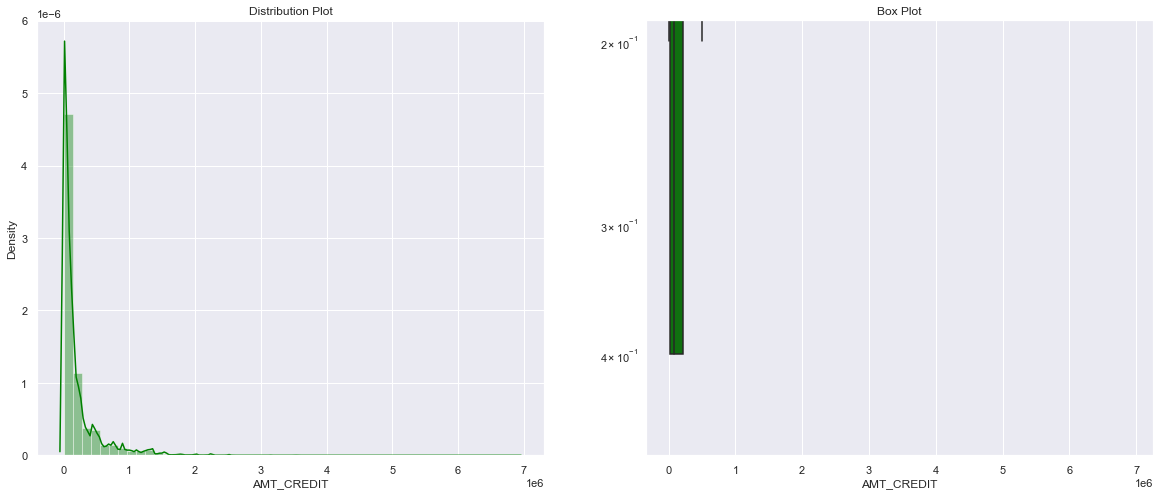

In [91]:
uni(df=application_data_prev,col='AMT_CREDIT')

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/swapnilgaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:376: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



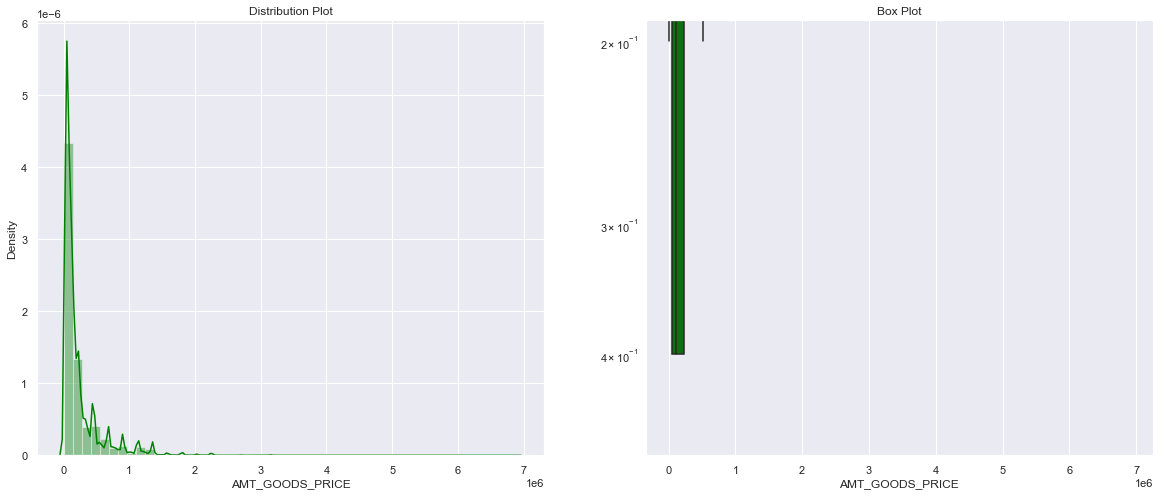

In [92]:
uni(df=application_data_prev,col='AMT_GOODS_PRICE')

In [ ]:
##Bivariate analysis after combining previous and current data

In [93]:
application_data_new=application_data[['SK_ID_CURR','TARGET']]
application_data_new

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0
...,...,...
307506,456251,0
307507,456252,0
307508,456253,0
307509,456254,1


In [94]:
# merging application and previous application data on 'SK_ID_CURR'
application_data_merge = application_data_new.merge(application_data_prev,on='SK_ID_CURR', how='inner')
application_data_merge.shape

(1413701, 38)

In [95]:
table = pd.pivot_table(application_data_merge, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
table

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,0.088216,0.145205,0.110940,0.089448
Refreshed,0.065158,0.081098,0.117412,0.074324
Repeater,0.072144,0.091767,0.120596,0.083338


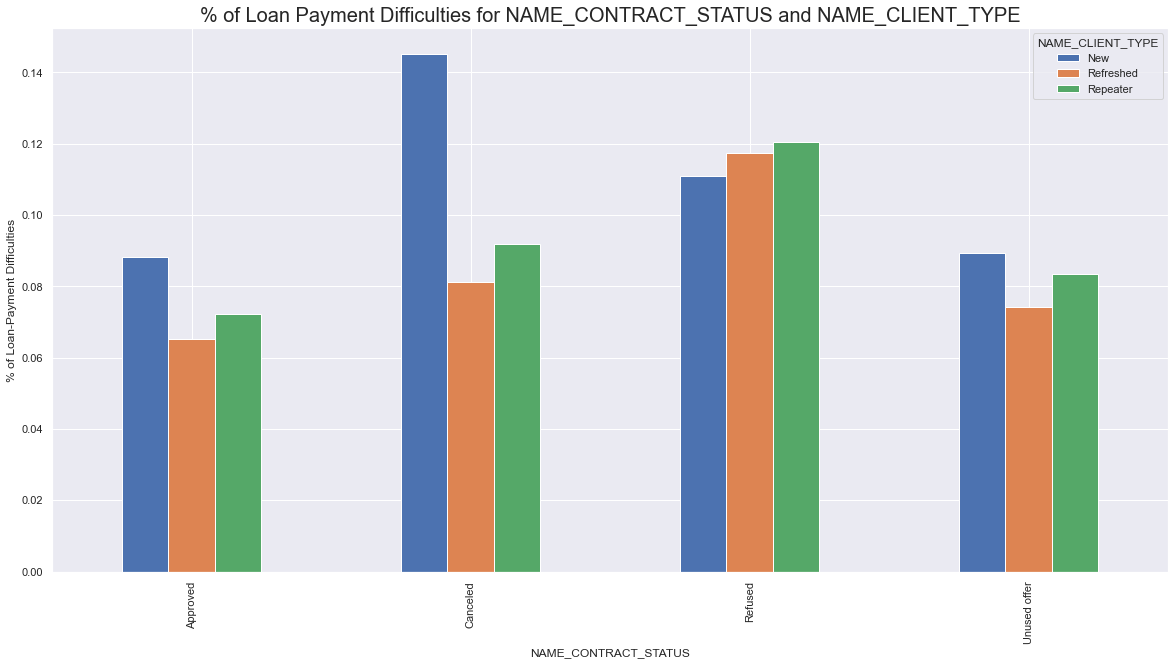

In [96]:
ax = table.T.plot(kind='bar')
ylab = ax.set_ylabel('% of Loan-Payment Difficulties')
plt.title('% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE', fontdict={'fontsize':20})
plt.show()

In [98]:
table = pd.pivot_table(application_data_merge, values='TARGET', index=['NAME_CONTRACT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
table

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,0.075516,0.088401,0.12581,0.092593
Consumer loans,0.073853,0.128668,0.10135,0.082337
Revolving loans,0.090343,0.109254,0.12905,0.000000


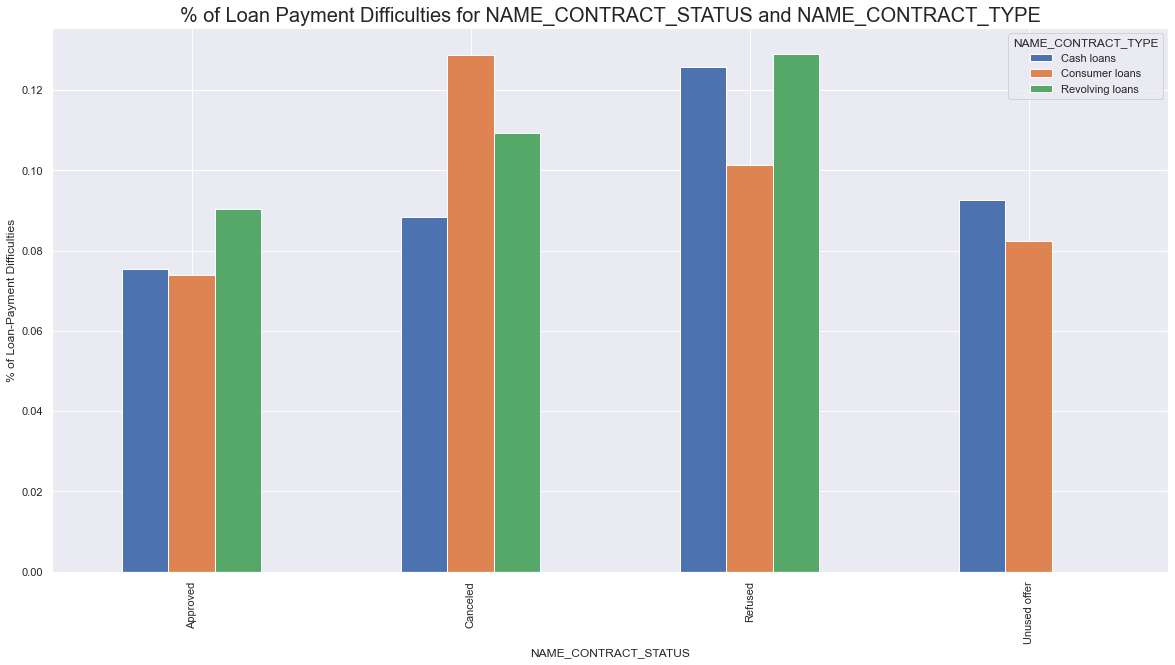

In [99]:
ax = table.T.plot(kind='bar')
ylab = ax.set_ylabel('% of Loan-Payment Difficulties')
plt.title('% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CONTRACT_TYPE', fontdict={'fontsize':20})
plt.show()

In [ ]:
##Application Data
## The count of ‘Maternity Leave’ in ‘NAME_INCOME_TYPE’ is very less and it also has maximum % of payment difficulties- around 40%. Hence, client with income type as ‘Maternity leave’ are the driving factors for Loan Defaulters.
## The count of ‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 17%. Hence, client with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters.
## The count of ‘Lower Secondary’ in ‘NAME_EDUCATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 11%. Hence, client with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters.

In [ ]:
##Previous Application Data
## The count of ‘Refusal to name the goal’ in ‘NAME_CASH_LOAN_PURPOSE’ is comparatively very less and it also has maximum % of payment difficulties- around 23%. Hence, clients who have ‘Refused to name the goal’ for cash loan in previous application are the driving factors for Loan Defaulters.
## The count of ‘Refused’ in ‘NAME_CONTRACT_STATUS’ is comparatively less and it also has maximum % of payment difficulties- around 12%. Hence, client with contract status as ‘Refused’ in previous application are the driving factors for Loan Defaulters.
## The count of ‘Revolving Loans’ in ‘NAME_CONTRACT_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 10%. Hence, client with contract type as ‘Revolving loans’ in previous application are the driving factors for Loan Defaulters.
## It can be observed from the graph that Clients with 'Revolving loans' and with 'Refused' previous application tend to have more % of payment difficulties in current application. Since the count of both 'Revolving loans' and ‘Refused’ is comparatively less(from the graphs in previous slide), clients with ‘Revolving Loans’ and ‘Refused’ previous application are driving factors for Loan Defaulters